## Limite de memoria VRAM

In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
    except RuntimeError as e:
        print(e)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"




Aprenderá técnicas de Redes Neuronales Recurrentes (RNN), incluyendo:

- Memoria a Corto Plazo (LSTM)

- Unidades Recurrentes Cerradas (GRU), implementadas en TensorFlow.

<br>

Trabajaremos con muchos datos secuenciales y temporales!

Repasemos cómo construir un modelo secuencial en TensorFlow usando la API secuencial. Parte de esto puede ser una revisión.

Como recordatorio, una red neuronal básica se compone de una capa de entrada que comprende uno o más nodos de entrada, un número cualquiera de capas ocultas  (compuestas por cualquier número de nodos cada una), y luego un capa de salida con uno o más nodos de salida.




#### Para empezar, creemos una red neuronal básica con una capa oculta usando TensorFlow's API secuencial.

- importar las siguientes bibliotecas

- para instanciar un modelo secuencial, necesitamos llamar al constructor tf.keras.Sequential() y asignar su salida a una variable en este caso la llamaré `model`

- Para agregar capas a `model` lo hacemos usando el método `add()` y pasamos un objeto de capa, como `tf.keras.layers.Dense()` para una capa `Dense`,  especificando el número de nodos en esa capa.

In [2]:
import math
from tensorflow.keras import layers

model = tf.keras.Sequential()

Después de eso, agregamos capas a model usando el método add() y pásar un objeto de capa, como tf.keras.layers.Dense() para un Dense capa, y especificando el número de nodos en esa capa.

Para la primera capa oculta que definimos, también debemos especificar la forma de entrada, que creará la capa de entrada para nosotros. Aquí hay un ejemplo de una red neuronal simple con:

- 3 nodos de entrada en la capa de entrada
- una capa oculta con 5 nodos en él
- 1 nodo de salida en la capa de salida

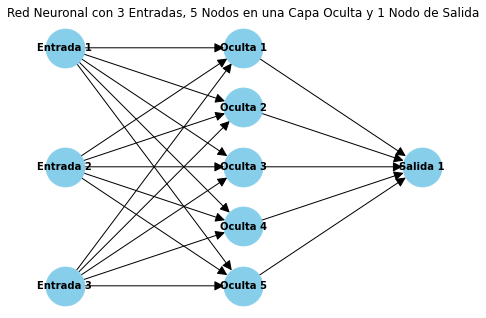

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# Función para dibujar la red neuronal
def draw_neural_network():
    G = nx.DiGraph()
    
    # Agregar nodos y conexiones
    G.add_nodes_from(['Entrada 1', 'Entrada 2', 'Entrada 3'])
    G.add_nodes_from(['Oculta 1', 'Oculta 2', 'Oculta 3', 'Oculta 4', 'Oculta 5'])
    G.add_nodes_from(['Salida 1'])
    
    G.add_edges_from([('Entrada 1', 'Oculta 1'), ('Entrada 1', 'Oculta 2'),
                      ('Entrada 1', 'Oculta 3'), ('Entrada 1', 'Oculta 4'),
                      ('Entrada 1', 'Oculta 5'),
                      ('Entrada 2', 'Oculta 1'), ('Entrada 2', 'Oculta 2'),
                      ('Entrada 2', 'Oculta 3'), ('Entrada 2', 'Oculta 4'),
                      ('Entrada 2', 'Oculta 5'),
                      ('Entrada 3', 'Oculta 1'), ('Entrada 3', 'Oculta 2'),
                      ('Entrada 3', 'Oculta 3'), ('Entrada 3', 'Oculta 4'),
                      ('Entrada 3', 'Oculta 5'),
                      ('Oculta 1', 'Salida 1'), ('Oculta 2', 'Salida 1'),
                      ('Oculta 3', 'Salida 1'), ('Oculta 4', 'Salida 1'),
                      ('Oculta 5', 'Salida 1')])
    
    # Dibujar la red neuronal
    pos = {'Entrada 1': (1, 2), 'Entrada 2': (1, 0), 'Entrada 3': (1, -2)}
    for i in range(5):
        pos[f'Oculta {i+1}'] = (3, 2-i)
    pos['Salida 1'] = (5, 0)
    
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
    plt.title("Red Neuronal con 3 Entradas, 5 Nodos en una Capa Oculta y 1 Nodo de Salida")
    plt.show()

# Dibujar la red neuronal
draw_neural_network()


**Capa oculta:**

- Cada nodo en la capa oculta está totalmente conectado a todas las entradas, lo que significa que cada nodo recibe una conexión de entrada de cada una de las 3 entradas.
- Cada conexión de entrada tiene un peso asociado. Dado que hay 3 entradas y 5 nodos en la capa oculta, hay un total de 3 * 5 = 15 pesos asociados a las conexiones de entrada.
- Además, cada nodo en la capa oculta tiene un sesgo (bias) asociado. Como hay 5 nodos en la capa oculta, hay un total de 5 sesgos.
- Por lo tanto, el número total de parámetros en la capa oculta es 15 pesos + 5 sesgos = 20 parámetros.


**Capa de salida:**

- Cada nodo en la capa de salida está conectado a cada nodo en la capa oculta.
- Dado que hay 5 nodos en la capa oculta y 1 nodo en la capa de salida, hay un total de 5 conexiones entre la capa oculta y la capa de salida.
- Cada conexión tiene un peso asociado, lo que suma 5 pesos.
- Además, hay un sesgo asociado al nodo de salida.
- Por lo tanto, el número total de parámetros en la capa de salida es 5 pesos + 1 sesgo = 6 parámetros.

In [4]:
model.add(layers.Dense(5, input_shape=(3,)))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26 (104.00 Byte)
Trainable params: 26 (104.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


En la pantalla anterior, construimos una red neuronal simple con una capa oculta entre las capas de entrada y salida. 

En la práctica, generalmente incluimos múltiples capas en nuestras redes neuronales para mejorar el rendimiento del modelo — aunque también muchas capas pueden crear complejidad innecesaria y pueden causar problemas con sobreajuste que es cuando el modelo aprende a predecir los datos de entrenamiento realmente bien, pero funciona mal en los datos que no ha visto antes.

Podemos definir un función de activación para cada capa del modelo. 

Si bien a veces definimos uno para nuestra capa de salida, no lo haremos aquí. 

La función de activación se aplica a la suma ponderada de los valores de entrada más un término de sesgo para cada nodo para generar su valor de salida. La función de activación más común es la Unidad Lineal Rectificada, o `ReLU`. 

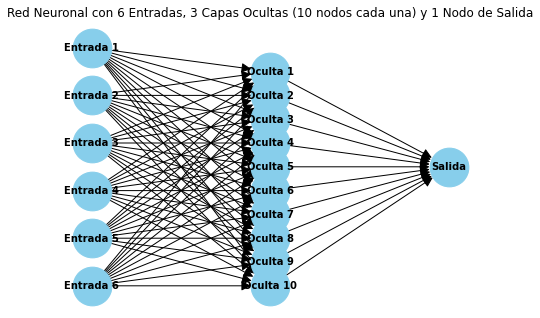

In [5]:
# Función para dibujar la red neuronal
def draw_neural_network():
    G = nx.DiGraph()
    
    # Agregar nodos y conexiones
    G.add_nodes_from(['Entrada 1', 'Entrada 2', 'Entrada 3', 'Entrada 4', 'Entrada 5', 'Entrada 6'])
    G.add_nodes_from(['Oculta 1', 'Oculta 2', 'Oculta 3', 'Oculta 4', 'Oculta 5', 'Oculta 6', 'Oculta 7', 'Oculta 8', 'Oculta 9', 'Oculta 10'])
    G.add_node('Salida')
    
    G.add_edges_from([('Entrada 1', 'Oculta 1'), ('Entrada 1', 'Oculta 2'), ('Entrada 1', 'Oculta 3'), ('Entrada 1', 'Oculta 4'),
                      ('Entrada 1', 'Oculta 5'), ('Entrada 1', 'Oculta 6'), ('Entrada 1', 'Oculta 7'), ('Entrada 1', 'Oculta 8'),
                      ('Entrada 1', 'Oculta 9'), ('Entrada 1', 'Oculta 10'),
                      ('Entrada 2', 'Oculta 1'), ('Entrada 2', 'Oculta 2'), ('Entrada 2', 'Oculta 3'), ('Entrada 2', 'Oculta 4'),
                      ('Entrada 2', 'Oculta 5'), ('Entrada 2', 'Oculta 6'), ('Entrada 2', 'Oculta 7'), ('Entrada 2', 'Oculta 8'),
                      ('Entrada 2', 'Oculta 9'), ('Entrada 2', 'Oculta 10'),
                      ('Entrada 3', 'Oculta 1'), ('Entrada 3', 'Oculta 2'), ('Entrada 3', 'Oculta 3'), ('Entrada 3', 'Oculta 4'),
                      ('Entrada 3', 'Oculta 5'), ('Entrada 3', 'Oculta 6'), ('Entrada 3', 'Oculta 7'), ('Entrada 3', 'Oculta 8'),
                      ('Entrada 3', 'Oculta 9'), ('Entrada 3', 'Oculta 10'),
                      ('Entrada 4', 'Oculta 1'), ('Entrada 4', 'Oculta 2'), ('Entrada 4', 'Oculta 3'), ('Entrada 4', 'Oculta 4'),
                      ('Entrada 4', 'Oculta 5'), ('Entrada 4', 'Oculta 6'), ('Entrada 4', 'Oculta 7'), ('Entrada 4', 'Oculta 8'),
                      ('Entrada 4', 'Oculta 9'), ('Entrada 4', 'Oculta 10'),
                      ('Entrada 5', 'Oculta 1'), ('Entrada 5', 'Oculta 2'), ('Entrada 5', 'Oculta 3'), ('Entrada 5', 'Oculta 4'),
                      ('Entrada 5', 'Oculta 5'), ('Entrada 5', 'Oculta 6'), ('Entrada 5', 'Oculta 7'), ('Entrada 5', 'Oculta 8'),
                      ('Entrada 5', 'Oculta 9'), ('Entrada 5', 'Oculta 10'),
                      ('Entrada 6', 'Oculta 1'), ('Entrada 6', 'Oculta 2'), ('Entrada 6', 'Oculta 3'), ('Entrada 6', 'Oculta 4'),
                      ('Entrada 6', 'Oculta 5'), ('Entrada 6', 'Oculta 6'), ('Entrada 6', 'Oculta 7'), ('Entrada 6', 'Oculta 8'),
                      ('Entrada 6', 'Oculta 9'), ('Entrada 6', 'Oculta 10'),
                      ('Oculta 1', 'Salida'), ('Oculta 2', 'Salida'), ('Oculta 3', 'Salida'), ('Oculta 4', 'Salida'),
                      ('Oculta 5', 'Salida'), ('Oculta 6', 'Salida'), ('Oculta 7', 'Salida'), ('Oculta 8', 'Salida'),
                      ('Oculta 9', 'Salida'), ('Oculta 10', 'Salida')])
    
    # Dibujar la red neuronal
    pos = {'Entrada 1': (1, 5), 'Entrada 2': (1, 3), 'Entrada 3': (1, 1), 'Entrada 4': (1, -1), 'Entrada 5': (1, -3), 'Entrada 6': (1, -5)}
    for i in range(10):
        pos[f'Oculta {i+1}'] = (3, 4-i)
    pos['Salida'] = (5, 0)
    
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
    plt.title("Red Neuronal con 6 Entradas, 3 Capas Ocultas (10 nodos cada una) y 1 Nodo de Salida")
    plt.show()

# Dibujar la red neuronal
draw_neural_network()


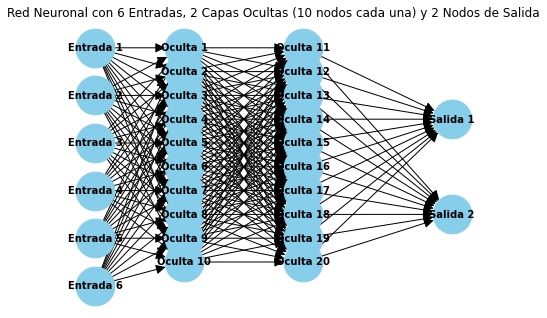

In [6]:
# Función para dibujar la red neuronal
def draw_neural_network():
    G = nx.DiGraph()
    
    # Agregar nodos y conexiones
    G.add_nodes_from(['Entrada 1', 'Entrada 2', 'Entrada 3', 'Entrada 4', 'Entrada 5', 'Entrada 6'])
    G.add_nodes_from(['Oculta 1', 'Oculta 2', 'Oculta 3', 'Oculta 4', 'Oculta 5', 'Oculta 6', 'Oculta 7', 'Oculta 8', 'Oculta 9', 'Oculta 10'])
    G.add_nodes_from(['Oculta 11', 'Oculta 12', 'Oculta 13', 'Oculta 14', 'Oculta 15', 'Oculta 16', 'Oculta 17', 'Oculta 18', 'Oculta 19', 'Oculta 20'])
    G.add_nodes_from(['Salida 1', 'Salida 2'])
    
    G.add_edges_from([('Entrada 1', 'Oculta 1'), ('Entrada 1', 'Oculta 2'), ('Entrada 1', 'Oculta 3'), ('Entrada 1', 'Oculta 4'),
                      ('Entrada 1', 'Oculta 5'), ('Entrada 1', 'Oculta 6'), ('Entrada 1', 'Oculta 7'), ('Entrada 1', 'Oculta 8'),
                      ('Entrada 1', 'Oculta 9'), ('Entrada 1', 'Oculta 10'),
                      ('Entrada 2', 'Oculta 1'), ('Entrada 2', 'Oculta 2'), ('Entrada 2', 'Oculta 3'), ('Entrada 2', 'Oculta 4'),
                      ('Entrada 2', 'Oculta 5'), ('Entrada 2', 'Oculta 6'), ('Entrada 2', 'Oculta 7'), ('Entrada 2', 'Oculta 8'),
                      ('Entrada 2', 'Oculta 9'), ('Entrada 2', 'Oculta 10'),
                      ('Entrada 3', 'Oculta 1'), ('Entrada 3', 'Oculta 2'), ('Entrada 3', 'Oculta 3'), ('Entrada 3', 'Oculta 4'),
                      ('Entrada 3', 'Oculta 5'), ('Entrada 3', 'Oculta 6'), ('Entrada 3', 'Oculta 7'), ('Entrada 3', 'Oculta 8'),
                      ('Entrada 3', 'Oculta 9'), ('Entrada 3', 'Oculta 10'),
                      ('Entrada 4', 'Oculta 1'), ('Entrada 4', 'Oculta 2'), ('Entrada 4', 'Oculta 3'), ('Entrada 4', 'Oculta 4'),
                      ('Entrada 4', 'Oculta 5'), ('Entrada 4', 'Oculta 6'), ('Entrada 4', 'Oculta 7'), ('Entrada 4', 'Oculta 8'),
                      ('Entrada 4', 'Oculta 9'), ('Entrada 4', 'Oculta 10'),
                      ('Entrada 5', 'Oculta 1'), ('Entrada 5', 'Oculta 2'), ('Entrada 5', 'Oculta 3'), ('Entrada 5', 'Oculta 4'),
                      ('Entrada 5', 'Oculta 5'), ('Entrada 5', 'Oculta 6'), ('Entrada 5', 'Oculta 7'), ('Entrada 5', 'Oculta 8'),
                      ('Entrada 5', 'Oculta 9'), ('Entrada 5', 'Oculta 10'),
                      ('Entrada 6', 'Oculta 1'), ('Entrada 6', 'Oculta 2'), ('Entrada 6', 'Oculta 3'), ('Entrada 6', 'Oculta 4'),
                      ('Entrada 6', 'Oculta 5'), ('Entrada 6', 'Oculta 6'), ('Entrada 6', 'Oculta 7'), ('Entrada 6', 'Oculta 8'),
                      ('Entrada 6', 'Oculta 9'), ('Entrada 6', 'Oculta 10'),
                      ('Oculta 1', 'Oculta 11'), ('Oculta 2', 'Oculta 11'), ('Oculta 3', 'Oculta 11'), ('Oculta 4', 'Oculta 11'),
                      ('Oculta 5', 'Oculta 11'), ('Oculta 6', 'Oculta 11'), ('Oculta 7', 'Oculta 11'), ('Oculta 8', 'Oculta 11'),
                      ('Oculta 9', 'Oculta 11'), ('Oculta 10', 'Oculta 11'),
                      ('Oculta 1', 'Oculta 12'), ('Oculta 2', 'Oculta 12'), ('Oculta 3', 'Oculta 12'), ('Oculta 4', 'Oculta 12'),
                      ('Oculta 5', 'Oculta 12'), ('Oculta 6', 'Oculta 12'), ('Oculta 7', 'Oculta 12'), ('Oculta 8', 'Oculta 12'),
                      ('Oculta 9', 'Oculta 12'), ('Oculta 10', 'Oculta 12'),
                      ('Oculta 1', 'Oculta 13'), ('Oculta 2', 'Oculta 13'), ('Oculta 3', 'Oculta 13'), ('Oculta 4', 'Oculta 13'),
                      ('Oculta 5', 'Oculta 13'), ('Oculta 6', 'Oculta 13'), ('Oculta 7', 'Oculta 13'), ('Oculta 8', 'Oculta 13'),
                      ('Oculta 9', 'Oculta 13'), ('Oculta 10', 'Oculta 13'),
                      ('Oculta 1', 'Oculta 14'), ('Oculta 2', 'Oculta 14'), ('Oculta 3', 'Oculta 14'), ('Oculta 4', 'Oculta 14'),
                      ('Oculta 5', 'Oculta 14'), ('Oculta 6', 'Oculta 14'), ('Oculta 7', 'Oculta 14'), ('Oculta 8', 'Oculta 14'),
                      ('Oculta 9', 'Oculta 14'), ('Oculta 10', 'Oculta 14'),
                      ('Oculta 1', 'Oculta 15'), ('Oculta 2', 'Oculta 15'), ('Oculta 3', 'Oculta 15'), ('Oculta 4', 'Oculta 15'),
                      ('Oculta 5', 'Oculta 15'), ('Oculta 6', 'Oculta 15'), ('Oculta 7', 'Oculta 15'), ('Oculta 8', 'Oculta 15'),
                      ('Oculta 9', 'Oculta 15'), ('Oculta 10', 'Oculta 15'),
                      ('Oculta 1', 'Oculta 16'), ('Oculta 2', 'Oculta 16'), ('Oculta 3', 'Oculta 16'), ('Oculta 4', 'Oculta 16'),
                      ('Oculta 5', 'Oculta 16'), ('Oculta 6', 'Oculta 16'), ('Oculta 7', 'Oculta 16'), ('Oculta 8', 'Oculta 16'),
                      ('Oculta 9', 'Oculta 16'), ('Oculta 10', 'Oculta 16'),
                      ('Oculta 1', 'Oculta 17'), ('Oculta 2', 'Oculta 17'), ('Oculta 3', 'Oculta 17'), ('Oculta 4', 'Oculta 17'),
                      ('Oculta 5', 'Oculta 17'), ('Oculta 6', 'Oculta 17'), ('Oculta 7', 'Oculta 17'), ('Oculta 8', 'Oculta 17'),
                      ('Oculta 9', 'Oculta 17'), ('Oculta 10', 'Oculta 17'),
                      ('Oculta 1', 'Oculta 18'), ('Oculta 2', 'Oculta 18'), ('Oculta 3', 'Oculta 18'), ('Oculta 4', 'Oculta 18'),
                      ('Oculta 5', 'Oculta 18'), ('Oculta 6', 'Oculta 18'), ('Oculta 7', 'Oculta 18'), ('Oculta 8', 'Oculta 18'),
                      ('Oculta 9', 'Oculta 18'), ('Oculta 10', 'Oculta 18'),
                      ('Oculta 1', 'Oculta 19'), ('Oculta 2', 'Oculta 19'), ('Oculta 3', 'Oculta 19'), ('Oculta 4', 'Oculta 19'),
                      ('Oculta 5', 'Oculta 19'), ('Oculta 6', 'Oculta 19'), ('Oculta 7', 'Oculta 19'), ('Oculta 8', 'Oculta 19'),
                      ('Oculta 9', 'Oculta 19'), ('Oculta 10', 'Oculta 19'),
                      ('Oculta 1', 'Oculta 20'), ('Oculta 2', 'Oculta 20'), ('Oculta 3', 'Oculta 20'), ('Oculta 4', 'Oculta 20'),
                      ('Oculta 5', 'Oculta 20'), ('Oculta 6', 'Oculta 20'), ('Oculta 7', 'Oculta 20'), ('Oculta 8', 'Oculta 20'),
                      ('Oculta 9', 'Oculta 20'), ('Oculta 10', 'Oculta 20'),
                      ('Oculta 11', 'Salida 1'), ('Oculta 12', 'Salida 1'), ('Oculta 13', 'Salida 1'), ('Oculta 14', 'Salida 1'),
                      ('Oculta 15', 'Salida 1'), ('Oculta 16', 'Salida 1'), ('Oculta 17', 'Salida 1'), ('Oculta 18', 'Salida 1'),
                      ('Oculta 19', 'Salida 1'), ('Oculta 20', 'Salida 1'),
                      ('Oculta 11', 'Salida 2'), ('Oculta 12', 'Salida 2'), ('Oculta 13', 'Salida 2'), ('Oculta 14', 'Salida 2'),
                      ('Oculta 15', 'Salida 2'), ('Oculta 16', 'Salida 2'), ('Oculta 17', 'Salida 2'), ('Oculta 18', 'Salida 2'),
                      ('Oculta 19', 'Salida 2'), ('Oculta 20', 'Salida 2')])
    
    # Dibujar la red neuronal
    pos = {'Entrada 1': (1, 5), 'Entrada 2': (1, 3), 'Entrada 3': (1, 1), 'Entrada 4': (1, -1), 'Entrada 5': (1, -3), 'Entrada 6': (1, -5)}
    for i in range(10):
        pos[f'Oculta {i+1}'] = (7, 5-i)
    for i in range(10, 20):
        pos[f'Oculta {i+1}'] = (15, 15-i)
    pos['Salida 1'] = (25, 2)
    pos['Salida 2'] = (25, -2)
    
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
    plt.title("Red Neuronal con 6 Entradas, 2 Capas Ocultas (10 nodos cada una) y 2 Nodos de Salida")
    plt.show()

# Dibujar la red neuronal
draw_neural_network()


In [7]:
model = tf.keras.Sequential()
model.add(layers.Dense(10, input_shape=(6,),activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2))

model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                70        
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 2)                 22        
                                                                 
Total params: 312 (1.22 KB)
Trainable params: 312 (1.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Ahora que hemos revisado los conceptos básicos de la creación de una red neuronal simple utilizando la API secuencial en TensorFlow, vamos a sumergirnos en los detalles de la creación de una red neuronal recurrente.

La mayor diferencia entre las redes neuronales simples que hemos creado hasta ahora, también conocidas como redes **feed-forward**, y las redes neuronales recurrentes (RNN) es que una RNN hace uso de "memoria" dentro de las capas ocultas.

Más específicamente, en una red de alimentación directa, las capas ocultas toman entrada solo desde capas anteriores y salida de paso solo a capas posteriores. Una RNN tiene una capa en la que la salida de esa capa también se devolvió a sí mismo para pases posteriores a través de la red.


1. **Red de alimentación directa (Feedforward)**:
   En una red de alimentación directa, la información fluye en una dirección única, desde la capa de entrada a través de una o más capas ocultas hasta la capa de salida. En este tipo de red, cada neurona en una capa dada solo está conectada a neuronas en la capa anterior y en la capa siguiente, y no hay conexiones retroalimentadas hacia las capas anteriores. Esto significa que no hay realimentación de la salida de las capas hacia las capas anteriores. Por lo tanto, la información solo fluye hacia adelante a través de la red, de ahí el término "alimentación directa".
   
En las pantallas anteriores, solo implementamos capas ocultas tipo `Dense`.

2. **Red neuronal recurrente (RNN)**:
   En una red neuronal recurrente, se introduce el concepto de realimentación. Esto significa que además de recibir entradas de capas anteriores y enviar salidas a capas posteriores, las neuronas en una capa oculta también pueden enviar información a sí mismas en el siguiente paso de tiempo. Esto crea un bucle de retroalimentación que permite a la red recordar información de pasos de tiempo anteriores, lo que le otorga la capacidad de modelar secuencias y datos temporales de manera efectiva. La capacidad de una RNN para mantener y utilizar información a lo largo del tiempo es fundamental en tareas como el procesamiento de lenguaje natural, la predicción de series temporales y el reconocimiento de voz, donde la entrada es una secuencia de datos.


De esta manera, se puede considerar que las RNN tienen "memoria" de datos anteriores.

Aquí hay un visual para mostrar la diferencia en la arquitectura entre una red de feed-forward y un RNN:



Para construir un RNN, necesitamos agregar una capa recurrente de algún tipo. TensorFlow tiene varios tipos diferentes de estas capas para que podamos elegir, sobre las cuales aprenderemos más en pantallas posteriores y en lecciones posteriores. Por ahora, usemos una capa `SimpleRNN`. 

Usaremos esto para la primera capa oculta en lugar de la Dense capa que usamos en la pantalla anterior.

- Instanciar un modelo secuencial y asignarlo a la variable model.

- Añadir a la capa `SimpleRNN` al modelo con 4 pasos de la memoria, 6 características por paso de tiempo, y 10 nodos en la primera capa oculta.

- Agregue una segunda capa oculta al modelo con 10 nodos.

- Modifique ambas capas ocultas para usar la función de activación de ReLU.

- Incluya una capa de salida con 2 nodos.

- Compile el modelo utilizando el optimizador Estocástico Gradient Descent y la *función Mean Squared Error loss.

- Imprima el resumen de la model para confirmar que tiene "Total params: 302."

- Enlace para visualizar los tipos de optimizadores: https://keras.io/api/optimizers/sgd/

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(10, input_shape=(4, 6), activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2))

model.compile(optimizer=tf.keras.optimizers.SGD(), loss='mean_square_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                170       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 2)                 22        
                                                                 
Total params: 302 (1.18 KB)
Trainable params: 302 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


La diferencia entre las redes de alimentación y las RNN, es que las RNN implican una especie de "memoria." 

Esta capacidad de las RNN para "recordar" datos anteriores es lo que los hace únicos.

Dada su calidad única de tener "memoria" de datos anteriores, tiene sentido que los RNN se utilicen más comúnmente para datos temporales o secuenciales de algún tipo. Algunos ejemplos de datos temporales incluyen pronósticos del tiempo, pronósticos de ventas e incluso predicciones del mercado de valores. Algunas aplicaciones comunes pero quizás menos obvias de RNN están en el campo del análisis de texto y la generación de texto. Los datos textuales son inherentemente secuenciales y los RNN se pueden usar para clasificar partes del habla e incluso generar su propio texto, como con la funcionalidad de autocorrección o autocompletar.

## Capas GRU y LSTM

En la última pantalla, presentamos el tipo de capa `SimpleRNN`, esta es **una de las tres capas RNN incorporadas disponibles en Keras**. Los otros dos son: 

- La capa GRU (Unidad Recurrente Cerrada) 

- La capa LSTM (Memoria Larga a Corto Plazo). 

Por tanto los tres tipos de capas con los que se va a trabajar se hace referencia de la siguiente manera:


```python
tf.keras.layers.SimpleRNN()
tf.keras.layers.GRU()
tf.keras.layers.LSTM()
```

También es posible crear capas recurrentes personalizadas usando la clase Keras `tf.keras.layers.RNN`, pero eso está más allá del alcance de este curso.

Construyamos un modelo que use una capa `LSTM` en lugar de una capa `SimpleRNN` para ver si hay alguna diferencia significativa entre sus resúmenes.


- Instanciar el modelo Sequential y asignarlo a la variable model.

- Agregar un LSTM capa al modelo con 6 características (por paso de tiempo), 4 (pasos de tiempo), 10 nodos en la primera capa oculta y una función de activación ReLU.

- Agregue una segunda capa oculta al modelo con 10 nodos y una función de activación ReLU.

- Agregue una capa de salida con 2 nodos.

- Compile el modelo usando el optimizador Adam y la función de pérdida de error cuadrado medio.

- Imprime el resumen de la model para confirmar que tiene "Params totales: 812."

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(10, input_shape=(4, 6),activation='relu')) # 4 pasos por tiempo.
                                                                          # 6 caracteristicas por paso.
model.add(tf.keras.layers.Dense(10,activation='relu'))
model.add(tf.keras.layers.Dense(2))

model.compile(optimizer='adam', loss='mean_square_error')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                680       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 2)                 22        
                                                                 
Total params: 812 (3.17 KB)
Trainable params: 812 (3.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


¿Notaste que la primera capa en nuestro LSTM el modelo tiene cuatro veces más parámetros que el comparable SimpleRNN modelo que construimos anteriormente? Discutiremos esto más a fondo en una próxima lección, pero claramente un LSTM capa tiene más cosas sucediendo debajo de la superficie que una SimpleRNN hace!


### Redes neuronales especializadas

Hemos aprendido sobre las RNN como un tipo especializado de red neuronal. Sin embargo, las RNN no son redes solo de un tipo de red neuronal especializada. 

Por ejemplo, las redes neuronales convolucionales (CNN) son otro tipo de red neuronal especializada.

- Una RNN están diseñadas para datos secuenciales o temporales e incorporan memoria de un paso al siguiente.

- Una CNN se usa más comúnmente con datos y usos de imágenes capas convolucionales que aplican filtros (llamados núcleos) y otras transformaciones a los datos de entrada.


Lo que puede no ser obvio es que las capas convolucionales y las RNN no son mutuamente excluyentes.

Es posible combinar capas recurrentes con capas convolucionales en el mismo modelo. También es posible hacer transformaciones convolucionales dentro de una capa recurrente como LSTM.

Ambas técnicas pueden reunir los beneficios de las capas convolucionales de procesamiento de imágenes mejorado con la memoria y las fortalezas temporales de las RNN. Este tipo de implementación se usa típicamente para procesar video u otras aplicaciones más avanzadas.


En el siguiente ejercicio, construiremos un nuevo modelo similar al modelo `LSTM` de la pantalla anterior. Sin embargo, esta vez incluiremos una capa convolucional. Al agregar una capa convolucional a un modelo, a menudo agregamos tres capas separadas, una tras otra:

- una capa Conv.

- una capa MaxPooling.

- una capa Flatten.


Este es un ejemplo usando una capa `Conv2D` con 32 filtros, un tamaño de kernel de 3, y la introducción de datos en forma de (16, 10, 3):

```python
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(16, 10, 3)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
```

En una capa convolucional, el filtro, también conocido como  kernel, es una pequeña matriz que se desliza sobre los datos de entrada (como una imagen) y realiza un producto de punto en cada posición. Esta operación extrae características importantes de la entrada. El `kernel_size` especifica el ancho y la altura de este núcleo.



La línea de código que has proporcionado `model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(16, 10, 3)))` se refiere a la adición de una capa convolucional en una red neuronal utilizando la librería TensorFlow y Keras. Aquí tienes una explicación detallada de cada término y su función:

1. `tf.keras.layers.Conv2D`: Esta es la clase que representa una capa convolucional en Keras. La convolución es una operación fundamental en el procesamiento de imágenes y se utiliza para extraer características de una imagen. La "2D" en el nombre se refiere a que esta capa se utiliza específicamente para datos bidimensionales, como imágenes.

2. `filters=32`: Este parámetro especifica el número de filtros o "kernels" que se utilizarán en la convolución. Cada filtro es una matriz bidimensional que se desliza sobre la imagen de entrada para realizar la convolución. En este caso, se están utilizando 32 filtros.

3. `kernel_size=3`: Este parámetro indica el tamaño del kernel o filtro. En este caso, se especifica un tamaño de kernel de 3x3. Durante la convolución, este filtro se desliza sobre la imagen de entrada y realiza operaciones de multiplicación y suma en regiones de 3x3 píxeles a la vez.

4. `activation='relu'`: Esta es la función de activación que se aplicará después de la convolución. 'ReLU' significa 'Rectified Linear Unit' y es una función de activación comúnmente utilizada en redes neuronales convolucionales. Ayuda a introducir no linealidad en la red y a aprender representaciones más complejas.

5. `input_shape=(16, 10, 3)`: Este parámetro especifica la forma de los datos de entrada a la capa convolucional. En este caso, la capa espera datos de entrada bidimensionales con una forma de (16, 10, 3). Esto significa que se espera una imagen de tamaño 16x10 píxeles con 3 canales de color (rojo, verde y azul, en este caso).

En resumen, esta capa convolucional toma una imagen de entrada, realiza operaciones de convolución con 32 filtros de tamaño 3x3, aplica la función de activación ReLU y produce una salida que luego se pasa a la siguiente capa de la red neuronal. La convolución es una técnica poderosa para el procesamiento de imágenes que permite extraer características importantes de los datos de entrada.


Por ejemplo, un `kernel_size` de 3 significa que se usa un filtro 3x3. 

**El número de filters** en la capa indica cuántos tipos diferentes de características puedes extraer, ya que cada filtro aprende a reconocer una característica diferente en los datos de entrada.


La diferencia entre usar capas convolucionales por sí mismas y usarlas junto con una RNN es que este último requiere que las envolvamos en una capa `TimeDistributed`.

Cuando estamos agregando una capa `TimeDistributed`, la `input_shape` especificada cambiará y debe ser del formulario (timesteps, ...) donde **timesteps** es el número de pasos de tiempo en nuestros datos, y lo demás ... debe coincidir con el `input_shape` de la capa con la que estamos envolviendo `TimeDistributed`.

Esto es porque la capa TimeDistributed espera que los datos de entrada tengan una dimensión adicional:

una dimensión de tiempo.

```
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(32, 3, activation='relu'), input_shape=(timesteps, 16, 10, 3)))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D()))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()))
```


En este ejemplo, `timesteps` es el número de pasos de tiempo en nuestra secuencia, y 16, 10, 3 es la forma de un solo paso en la secuencia. Entonces cuando usas `TimeDistributed`, necesitamos modificar input_shape para incluir los pasos de tiempo. Al envolver una capa en un `TimeDistributed` capa, tenemos que tener cuidado de que estamos pasando el `input_shape` argumento a la `TimeDistributed` capa y no la capa que está envolviendo.

Tenga en cuenta que no necesitamos envolver la capa `LSTM` en sí o cualquier capa posterior en `TimeDistributed`.


### Vamos a crear un modelo que utilice una capa Conv y una capa LSTM!


In [10]:
model = tf.keras.Sequential()
model.add(layers.TimeDistributed(layers.Conv2D(filters=64,
                                               kernel_size=2,
                                               activation='relu'),
                                 input_shape=(8, 12, 9, 1)))

model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D()))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()))
model.add(tf.keras.layers.LSTM(10,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2))

model.compile(optimizer="adam",
              loss='mean_squared_error')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 8, 11, 8, 64)      320       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 8, 5, 4, 64)       0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 8, 1280)           0         
 stributed)                                                      
                                                                 
 lstm_1 (LSTM)               (None, 10)                51640     
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                      

In [11]:
model.save('ejercicio_personal_52092.keras')

### Components of RNNs


Hemos visto que los componentes básicos de un RNN son:

- la capa de entrada
- una capa oculta con memoria (puede ser un simple RNN, LSTM u otra cosa) 
- una capa de salida. 


<br>

También hemos visto que es posible incluir capas ocultas adicionales, que incluso pueden incluir arquitecturas más avanzadas como capas convolucionales. En el ejercicio anterior, vimos cómo el uso de estas arquitecturas más avanzadas puede aumentar en gran medida el número de parámetros en nuestro modelo. ¡Aunque era bastante básico, nuestro modelo anterior que usaba una capa convolucional tenía más de 50,000 parámetros!

### Capa Bidireccional

En esta pantalla de codificación final, vamos a echar un vistazo a una característica adicional más para las RNN: 

- agregar una capa bidireccional. 

Esta característica es una que podemos agregar a cualquier capa recurrente como envoltorio. 


Hasta ahora, hemos estado pensando que las capas recurrentes tienen "memoria", lo que implica que solo la información de antes en la secuencia se puede usar. Esto tiene sentido para la mayoría de las aplicaciones temporales, como las ventas o el pronóstico del tiempo, donde usamos datos secuenciales pasados para predecir valores futuros. Sin embargo, para algunas aplicaciones RNN, puede ser útil entrenar modelos que puedan considerar la secuencia de datos en ambos direcciones: hacia atrás y adelante. 

Por ejemplo, al analizar los datos de texto para determinar la parte del habla de una palabra en particular, tiene sentido darle al modelo la capacidad de mirar las palabras que vienen antes en cuestión, así como las palabras que vienen después. 

Otro caso de uso interesante para estos bidireccional RNNs está en la predicción de la estructura de proteínas y otras secuencias biológicas.

Afortunadamente, TensorFlow tiene una incorporada una envoltura Bidirectional  que se puede aplicar a cualquier capa recurrente, como un SimpleRNN o LSTM. Esto transformará la capa en una que comparta "memoria" tanto hacia adelante como hacia atrás en la secuencia. Para usar este envoltorio, lo aplicamos a una capa RNN, similar a cómo lo aplicamos TimeDistributed para envolver el Conv capas en la pantalla anterior

- Instanciar un modelo secuencial y asignarlo a la variable model.

- Añadir una capa `LSTM` con envoltura, Bidirectional con 10 nodos, una función de activación de `ReLU` y una forma de entrada de (6, 4).

- Agregue otra capa oculta al modelo con 10 nodos y una función de activación de `ReLU`.

- Agregue una capa de salida con 2 nodos.

- Compile el modelo usando el optimizador `Adam` y la función de pérdida de error cuadrado medio.

- Imprima el resumen de la model para confirmar que tiene "Total params: 1,432."

In [12]:
model = tf.keras.Sequential()
model.add(layers.Bidirectional(layers.LSTM(10, activation='relu'), input_shape=(6, 4)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 20)                1200      
 al)                                                             
                                                                 
 dense_12 (Dense)            (None, 10)                210       
                                                                 
 dense_13 (Dense)            (None, 2)                 22        
                                                                 
Total params: 1432 (5.59 KB)
Trainable params: 1432 (5.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Por supuesto, aquí tienes el resumen del texto en puntos:

- Se revisaron los conceptos básicos de la sintaxis de TensorFlow, incluyendo inicialización de modelos, agregado de capas y compilación.
- Se presentó el concepto de redes neuronales recurrentes (RNN) y sus diferencias con las redes de alimentación directa.
- Se exploraron tres tipos de capas recurrentes disponibles en TensorFlow: 

    - SimpleRNN
    - LSTM
    - GRU, útiles para datos secuenciales y temporales.
    
<br>

- Se compararon las CNN y RNN en términos de arquitectura y casos de uso, destacando la utilidad de las CNN para datos de alta dimensión como imágenes.
- Se mostró cómo combinar CNN y RNN usando el envoltorio TimeDistributed, útil para procesar datos secuenciales de alta dimensión como el video.
- Se discutió la posibilidad de agregar una envoltura Bidirectional a capas recurrentes para permitir la "memoria" en ambas direcciones, útil para datos secuenciales no temporales como texto o secuencias de proteínas.

## 1. Arquitectura Básica RNN

vamos a sumergirnos en un poco más de detalle sobre la arquitectura de los modelos RNN y cómo usarlos para modelar un **problema de regresión**.

Usaremos un conjunto de datos para predecir popularidad de la canción de Kaggle. Este conjunto de datos incluye una columna de destino `song_popularity`, y varias características numéricas de la canción incluyendo `acousticness` y `danceability`.


Ya hemos realizado algunos pasos de preprocesamiento en este conjunto de datos para darnos un salto en las siguientes pantallas. 

Estos pasos incluyen eliminar el título de la canción, escalar las características con el objeto `StandardScaler()` de scikit-learn, y aplicando el método `train_test_split`  para generar cuatro archivos separados para importarlos.

- `song_data_xtrain.csv`, `song_data_ytrain.csv`, `song_data_xtest.csv`, y `song_data_ytest.csv`.

Nos gustaría tener una idea de cuán popular será nuestra canción en función de algunas de las características que podemos medir al respecto, a saber, incluidas en el conjunto de datos mencionado anteriormente. 

Utilizaremos estos datos (los csv's) para entrenar y evaluar nuestro modelo a medida que avanzamos.

Comenzaremos trabajando en los pasos necesarios para:

- Preparar los datos para su uso con TensorFlow y determinar las dimensiones de entrada apropiadas para el modelo.

- Luego pasaremos por los pasos para adaptar el modelo a un conjunto de datos de entrenamiento y usarlo para hacer predicciones en un conjunto de datos de prueba de retención.

Finalmente, vamos a pasar por una variedad de formas de optimizar el modelo, incluyendo la modificación del número de capas ocultas, el número de nodos en cada capa, la función de pérdida y el optimizador.


## 2. Preparar un modelo RNN

Como establecer el `input_shape` para cualquier capa recurrente.


Definimos como la primera capa en nuestro modelo. El parámetro `input_shape` de la primera capa se utiliza para informar a nuestro modelo sobre la forma en la que los datos de entrada que debe esperar. Si la primera capa de nuestro modelo es una capa recurrente, necesitamos especificar la forma un poco diferente que con otros tipos de capas, ya que las capas recurrentes son alimentadas con secuencias de datos y tienen un componente de "memoria".

Ahora, vamos a hablar sobre cómo determinar los valores apropiados para usar al definir `input_shape=(num_timesteps, num_features)`.


-`num_timesteps`: Esta es la longitud de las secuencias que estamos alimentando en la red. Podría ser la longitud de una oración, el número de puntos de tiempo en una serie de tiempo, o la longitud de una secuencia de otro tipo de datos. Esto también se conoce como pasos de la memoria.

-`num_features`: Esta es la dimensionalidad de los datos en cada paso de tiempo. Podría ser el número de variables distintas en nuestro conjunto de datos en cada paso de tiempo, o el tamaño del vector que estamos utilizando para representar cada punto de datos.

<br>

Los valores reales para `num_timesteps` y `num_features` dependerán del conjunto de datos específico con el que estamos trabajando y de cómo hemos elegido representar nuestros datos.


```python
# ejemplo:
model = tf.keras.Sequential()
model.add(layers.Bidirectional(layers.LSTM(10, activation='relu'), input_shape=(6, 4)))
```



Aquí hay algunos ejemplos:

1. Datos de texto (por ejemplo, revisiones de películas o tweets): Supongamos que estamos trabajando con datos de texto donde cada observación (una revisión de película o un tweet) se representa como una secuencia de 100 palabras. Y supongamos que cada palabra se representa como un vector de 300 dimensiones. Entonces,` num_timesteps` sería 100` (la longitud de cada revisión en palabras), y `num_features` sería 300 (el tamaño del vector que representa cada paso de tiempo). Entonces, nos habíamos puesto `input_shape=(100, 300)`.


2. Datos de la Serie de Tiempo (por ejemplo, precios de las acciones): Supongamos que estamos tratando de predecir los precios de las acciones, y para cada día, hemos registrado el precio de apertura, el precio de cierre, el precio más alto, el precio más bajo y el volumen. Decidimos utilizar los datos de los últimos 60 días para predecir el precio de cierre del día siguiente. Aquí, `num_timesteps` es 60 (la cantidad de días pasados que estamos usando), y num_features es 5 (el número de características que tenemos cada día). Entonces, `input_shape aquí estaría (60, 5)`.


3. Procesamiento de imágenes ( por ejemplo, cuadros de video ): Supongamos que estamos trabajando con datos de video, donde cada video dura 10 segundos y se ha grabado a una velocidad de 30 cuadros por segundo. Entonces, cada video tiene 300 cuadros ( o imágenes ). Si estamos tratando cada cuadro como una secuencia de datos, cada uno de estos cuadros podría verse como un paso de tiempo. Ahora, digamos que cada cuadro en el video es una imagen en escala de grises de tamaño 64x64 píxeles. Esta imagen 2D se puede aplanar en una matriz 1D, lo que da como resultado 4096 características para cada cuadro. Entonces, `num_timesteps sería 300` ( el número de cuadros ), y `num_features sería 4096` ( el número de píxeles en cada cuadro después de aplanar ). Así, `input_shape` en este caso sería (300, 4096).

Aunque un RNN (como un `SimpleRNN`) **se usa típicamente para datos de secuencia, también se puede usar para datos no secuenciales**.

En nuestro caso con los datos de la canción, la longitud de la secuencia sería 1 debido a que no hay una secuencia de puntos de datos para una sola canción, solo las características de cada canción individual se almacenan en las columnas. 

Entonces, para nuestros datos de canciones no secuenciales, el número de pasos de tiempo es 1 y el número de características es igual al número de columnas en nuestro conjunto de datos.

## 3. Trabajando con DataFrames

Al preparar datos para el aprendizaje automático — usando redes neuronales o de otro modo — es común tener datos almacenados en un DataFrame Pandas. 

En general, una fila en un DataFrame representa una sola observación y una columna representa una característica de los datos.

Para nuestros datos de canciones no secuenciales, `num_features` es igual al número de características en nuestros datos, por lo que tendremos que determinar el número de columnas en nuestro conjunto de datos. Podemos hacer esto con el atributo de Pandas `.shape`.

Por ejemplo, si hemos almacenado nuestros datos en la variable `df`, entonces podemos ver la forma de estos datos con lo siguiente:

`print(df.shape)`
Esto dará como resultado una tupla, como:

`(100, 10)`
En este ejemplo, el DataFrame tiene 100 filas y 10 columnas, lo que significa que el número de características que nos gustaría utilizar para estos datos sería 10. Podemos acceder a este segundo valor así:

`df.shape[1]`



**Una consideración final** al construir nuestro modelo es el **número de variables de resultado que tendremos**. 


Esto determinará el número de nodos de salida necesarios para nuestro modelo en la capa de salida. Para el conjunto de datos con el que estamos trabajando aquí sobre la popularidad de la canción, la popularidad de una canción es un valor numérico, por lo que solo necesitamos un nodo de salida en nuestra capa de salida final.

Importe las siguientes bibliotecas requeridas utilizando sus alias comunes:
    
- tensorflow
- pandas
- numpy

In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np

Cargue las características y las variables de destino del conjunto de datos de entrenamiento en dos variables separadas utilizando el `pd.read_csv()` función:

- Cargar el `song_data_xtrain.csv` (**características**) conjunto de datos en la variable `X_train`.
- Cargar el `song_data_ytrain.csv` (**objetivo**) conjunto de datos en la variable `y_train`.

In [14]:
X_train = pd.read_csv("01_Basic_RNN_Architecture/csv/song_data_xtrain.csv")
y_train = pd.read_csv("01_Basic_RNN_Architecture/csv/song_data_ytrain.csv")

Instanciar un objeto sequencial de tipo modelo en una variable. 

In [15]:
model = tf.keras.Sequential()

Añadir una capa `SimpleRNN` al modelo con:

- 3 nodos en la primera capa oculta.
- El número apropiado de etapas de tiempo para nuestros datos no secuenciales.
- El número apropiado de características para nuestro conjunto de datos almacenado en `X_train`.
- `ReLU` como función de activación.

In [16]:
num_features = X_train.shape[1]
print(num_features)


model.add(tf.keras.layers.SimpleRNN(3, input_shape=(1, num_features), activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

13
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 3)                 51        
                                                                 
 dense_14 (Dense)            (None, 1)                 4         
                                                                 
Total params: 55 (220.00 Byte)
Trainable params: 55 (220.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12619 entries, 0 to 12618
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_duration_ms  12619 non-null  float64
 1   acousticness      12619 non-null  float64
 2   danceability      12619 non-null  float64
 3   energy            12619 non-null  float64
 4   instrumentalness  12619 non-null  float64
 5   key               12619 non-null  float64
 6   liveness          12619 non-null  float64
 7   loudness          12619 non-null  float64
 8   audio_mode        12619 non-null  float64
 9   speechiness       12619 non-null  float64
 10  tempo             12619 non-null  float64
 11  time_signature    12619 non-null  float64
 12  audio_valence     12619 non-null  float64
dtypes: float64(13)
memory usage: 1.3 MB


In [18]:
X_train.head(2)

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.343646,-0.532610,0.030390,0.185681,-0.348566,1.035072,-0.259083,0.754719,-1.299135,-0.512009,-0.373235,0.135955,-0.675240
1,-0.220969,-0.895902,-1.479864,0.012798,-0.348252,1.035072,1.655417,-0.168131,-1.299135,-0.668973,0.204118,0.135955,1.537082


## 3. Ajuste de un modelo RNN

Ahora es necesario ajustar el modelo a nuestros datos de entrenamiento. 

Recuerda que los datos ya los han limpiado y escalado así que lo que hay que hacer es lo siguiente:


- Convertir los datos en una matriz `NumPy`.

- Reformar los datos para que coincidan con lo que espera el modelo recurrente.


In [19]:
# Convertir el X_train variable en una matriz NumPy

X_train_array = np.array(X_train) 

In [20]:
# Reformar X_train_array en una matriz de 3 dimensiones llamada X_train_reshaped

X_train_reshaped = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))

In [21]:
model.fit(X_train_reshaped, y_train)

395/395 [==============================] - 2s 3ms/step - loss: 3108.6194


## 4. Predicciones con un RNN

Ya hemos pasamos por el proceso de preparación de nuestros datos de entrenamiento antes de usarlos para entrenar nuestro modelo. 

Ahora tendremos que pasar por los mismos pasos de preparación (convertir a una matriz y remodelar los datos) con nuestros **datos de prueba** para usar nuestro modelo para hacer predicciones y luego evaluarlas predicciones.

Una vez que completado los pasos de preparación, vamos a querer usar nuestro modelo para hacer predicciones basadas en las características de nuestro conjunto de pruebas y almacenarlas en una variable. 

Por ejemplo, si nuestras características de prueba (recientemente remodeladas) se almacenan en una matriz llamada `test_feature_array`, podemos hacer predicciones y almacenarlas en una variable de salida predictions usando lo siguiente:

```python
predictions = model.predict(test_feature_array)
```

**Querremos evaluar el rendimiento de nuestro modelo** calculando **algún tipo de métrica** utilizando los valores predichos y los valores reales de nuestro conjunto de datos de prueba. 


Tenga en cuenta que:

- La métrica de puntuación para evaluar el modelo no es lo mismo que el valor de la función de pérdida que se utiliza para entrenar el modelo.

Aunque algunas funciones (como el Error Cuadrado Medio) se pueden utilizar para ambos. Si hemos almacenado nuestras predicciones desde arriba en la variable predictions, y nuestros verdaderos resultados se almacenan en test_outcomes, luego para calcular e imprimir el valor de la Error Cuadrático Medio (importado de scikit-learn), use la siguiente sintaxis:


```python
from sklearn.metrics import mean_squared_error

print(f"MSE on test set: {mean_squared_error(test_outcomes, predictions}")
```

Hagamos algunas predicciones usando nuestro entrenado model, y compare esas predicciones con los valores reales para determinar qué tan bien está funcionando nuestro modelo inicial.

1. Importar el mean_squared_error función de sklearn.metrics.
2. Cargue las características y la variable de destino para el conjunto de datos de prueba en dos variables separadas utilizando el pd.read_csv() función:
    - Cargar el `song_data_xtest.csv` ( características ) conjunto de datos en la variable `X_test`.
    - Cargar el `song_data_ytest.csv` ( objetivo ) conjunto de datos en la variable `y_test`.

3. Convertir la variable `X_test` en una matriz `NumPy` y almacenar los resultados en la variable `X_test_array`.
4. Reformar `X_test_array` en una matriz de 3 dimensiones llamada `X_test_reshaped` con:
    - El número de filas de la matriz original en la primera dimensión.
    - 1 en la segunda dimensión.
    - El número de columnas de la matriz original en la tercera dimensión.

Usa el modelo para hacer predicciones usando la variable`X_test_reshaped`. Almacene estas predicciones en la variable `y_pred`.

Calcule e imprima el Error Cuadrático Medio de las predicciones (y_pred) y los valores verdaderos (y_test).

In [22]:
from sklearn.metrics import mean_squared_error

X_test = pd.read_csv("01_Basic_RNN_Architecture/csv/song_data_xtest.csv")
y_test = pd.read_csv("01_Basic_RNN_Architecture/csv/song_data_ytest.csv")

In [23]:
# Convertir el X_test variable en una matriz NumPy

X_test_array = np.array(X_test) 

In [24]:
# Reformar X_train_array en una matriz de 3 dimensiones llamada X_train_reshaped

X_test_reshaped = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

In [25]:
y_pred = model.predict(X_test_reshaped)

print(f"MSE on test set: {mean_squared_error(y_test, y_pred)}")
print(math.sqrt(mean_squared_error(y_test, y_pred)))

195/195 [==============================] - 0s 736us/step
MSE on test set: 2942.9236865340563
54.24872059813076


## 5. Optimización de un RNN: Número de capas

¡Felicitaciones! Bueno, el hecho de que ahora podamos ajustar este modelo a nuestros datos y hacer predicciones es excelente. El rendimiento del modelo no es decididamente excelente.

Podemos comparar la raíz cuadrada de nuestra puntuación en el conjunto de pruebas hasta el momento — un Error Cuadrático Medio en el vecindario de `2786.4388603930747`, cuya raíz cuadrada ha terminado `52,786729965` — a la media `song_popularity` en nuestro conjunto de datos de prueba para algún punto de comparación. E


El siguiente cálculo rápido nos da el promedio de la variable objetivo, `song_popularity`:

In [26]:
print(round(y_test['song_popularity'].mean(), 2))

52.95


Dado que nuestro promedio `song_popularity` para el conjunto de datos de prueba es **52.95**, el Error Cuadrático Medio resultante de nuestras predicciones de la última pantalla no es particularmente impresionante, y no nos ayudará a predecir si nuestro próximo sencillo será un éxito o no. 


El razonamiento detrás de esa afirmación es el siguiente:

Se calculó el Error Cuadrático Medio (ECM) del modelo en el conjunto de pruebas, que resultó ser aproximadamente **2786.4388603930747**.

Se calculó la raíz cuadrada de este ECM para obtener una medida más comprensible, que es aproximadamente **52.786729965**.

Para establecer un punto de comparación, se calculó el promedio de la variable objetivo `song_popularity` en el conjunto de datos de prueba, que resultó ser `print(round(y_test['song_popularity'].mean(), 2)) 52.95`.


Dado que el error medio del modelo (ECM) **52.786729965** es ligeramente más bajo que el valor promedio de la variable objetivo **52.95** en el conjunto de datos de prueba 52.95, no se puede concluir que el rendimiento del modelo no sea decididamente excelente debido a un error considerablemente alto. 

De hecho, el rendimiento del modelo podría considerarse bastante bueno o al menos no se puede inferir su calidad solo en función de esta comparación.


#### Mejorar el rendimiento añadiendo capas ocultas:

In [27]:
# Defining the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(3, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Preparing the training data
X_train_array = np.array(X_train)
X_train_reshaped = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))

# Fitting the model
model.fit(X_train_reshaped, y_train)

# Preparing the test data
X_test_array = np.array(X_test)
X_test_reshaped = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

# Testing the model
y_pred = model.predict(X_test_reshaped)

# Printing results
print(f"MSE on test set: {mean_squared_error(y_test, y_pred)}")
print(math.sqrt(mean_squared_error(y_test, y_pred)))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 3)                 51        
                                                                 
 dense_15 (Dense)            (None, 3)                 12        
                                                                 
 dense_16 (Dense)            (None, 3)                 12        
                                                                 
 dense_17 (Dense)            (None, 3)                 12        
                                                                 
 dense_18 (Dense)            (None, 3)                 12        
                                                                 
 dense_19 (Dense)            (None, 3)                 12        
                                                                 
 dense_20 (Dense)            (None, 1)                

In [28]:
print(math.sqrt(mean_squared_error(y_test, y_pred)))

27.33196702411336


## 6. Optimización de un RNN: nodos por capa

Vimos que agregar cinco capas ocultas más hizo una diferencia bastante consistente en nuestro Error cuadrático medio del conjunto de pruebas.

El resultado todavía acabó de manera estable en 800 (he llegado hasta 498.9713985660072), lo que NO es lo suficientemente bueno como para predecir de manera confiable el éxito de nuestra próxima canción. 

#### ¡No preocuparsus!

Tenemos algunos mecanismos más por los cuales podemos optimizar este modelo. Por conveniencia, aquí está nuestro modelo después del ejercicio anterior

La siguiente forma en que podemos optimizar nuestro modelo es modificando el número de nodos en cada capa oculta. Al igual que con el número de capas, tenga en cuenta que si aumentamos el número de nodos en demasiado, ¡podemos llegar a un punto en el que hace muy poca diferencia en el rendimiento de nuestro modelo, o peor aún, hace que nuestro núcleo se bloquee! 

Si eso sucede, podemos reiniciarlo seleccionando Reiniciar bajo el Kernel menú en Jupyter. También tenga en cuenta que cuanto más grande se vuelve nuestro modelo (en términos de número de nodos por capa y número de capas), más tiempo lleva entrenar.

In [29]:
# Defining the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(26, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(tf.keras.layers.Dense(26, activation='relu'))
model.add(tf.keras.layers.Dense(26, activation='relu'))

model.add(tf.keras.layers.Dense(26, activation='relu'))

model.add(tf.keras.layers.Dense(26, activation='relu'))

model.add(tf.keras.layers.Dense(13, activation='relu'))
model.add(tf.keras.layers.Dense(7, activation='relu'))

model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Preparing the training data
X_train_array = np.array(X_train)
X_train_reshaped = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))

# Fitting the model
model.fit(X_train_reshaped, y_train)

# Preparing the test data
X_test_array = np.array(X_test)
X_test_reshaped = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

# Testing the model
y_pred = model.predict(X_test_reshaped)

# Printing results
print(f"MSE on test set: {mean_squared_error(y_test, y_pred)}")
print(math.sqrt(mean_squared_error(y_test, y_pred)))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 26)                1040      
                                                                 
 dense_21 (Dense)            (None, 26)                702       
                                                                 
 dense_22 (Dense)            (None, 26)                702       
                                                                 
 dense_23 (Dense)            (None, 26)                702       
                                                                 
 dense_24 (Dense)            (None, 26)                702       
                                                                 
 dense_25 (Dense)            (None, 13)                351       
                                                                 
 dense_26 (Dense)            (None, 7)                

No hay una regla que diga que debemos mantener el mismo número de nodos en cada capa, pero esta es una convención potencial a seguir. De hecho, hay pocas reglas duras y rápidas sobre cómo elegir el número de nodos por capa (¡o el número de capas!) en un modelo, y muchos en el campo generalmente están de acuerdo en que la experimentación es la única manera de determinar el número correcto para un problema dado. ¡Así que sigamos experimentando!

In [30]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(13, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(tf.keras.layers.Dense(169, activation='relu'))
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dense(42, activation='relu'))
model.add(tf.keras.layers.Dense(21, activation='relu'))
model.add(tf.keras.layers.Dense(11, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Preparing the training data
X_train_array = np.array(X_train)
X_train_reshaped = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))

# Fitting the model
model.fit(X_train_reshaped, y_train)

# Preparing the test data
X_test_array = np.array(X_test)
X_test_reshaped = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

# Testing the model
y_pred = model.predict(X_test_reshaped)

# Printing results
print(f"MSE on test set: {mean_squared_error(y_test, y_pred)}")
print(math.sqrt(mean_squared_error(y_test, y_pred)))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 13)                351       
                                                                 
 dense_28 (Dense)            (None, 169)               2366      
                                                                 
 dense_29 (Dense)            (None, 84)                14280     
                                                                 
 dense_30 (Dense)            (None, 42)                3570      
                                                                 
 dense_31 (Dense)            (None, 21)                903       
                                                                 
 dense_32 (Dense)            (None, 11)                242       
                                                                 
 dense_33 (Dense)            (None, 5)                

In [31]:
# Defining the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(3, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Preparing the training data
X_train_array = np.array(X_train)
X_train_reshaped = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))

# Fitting the model
model.fit(X_train_reshaped, y_train)

# Preparing the test data
X_test_array = np.array(X_test)
X_test_reshaped = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

# Testing the model
y_pred = model.predict(X_test_reshaped)

# Printing results
print(f"MSE on test set: {mean_squared_error(y_test, y_pred)}")
print(math.sqrt(mean_squared_error(y_test, y_pred)))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 3)                 51        
                                                                 
 dense_35 (Dense)            (None, 10)                40        
                                                                 
 dense_36 (Dense)            (None, 10)                110       
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
 dense_38 (Dense)            (None, 10)                110       
                                                                 
 dense_39 (Dense)            (None, 10)                110       
                                                                 
 dense_40 (Dense)            (None, 1)               

Todo lo anterior son simplemente pruebas con capas.

## 7 de 8 ·Optimización de un RNN: Función de pérdida y Optimizador

Hemos llegado a nuestra etapa final de optimización para esta lección. En las últimas pantallas, construimos nuestro modelo usando un SimpleRNN layer, y experimentamos con diferentes números de capas y nodos, mejorando el rendimiento del modelo en cada paso. Descubrimos que agregar 5 capas ocultas adicionales produjo los resultados más confiables en nuestro conjunto de pruebas.

En la pantalla anterior, aprendimos que aumentar el número de nodos por capa oculta nos permitió mejorar sustancialmente el rendimiento del modelo. Sin embargo, también aumentó sustancialmente el número de parámetros entrenables en nuestro modelo, lo que significó tiempos de entrenamiento más largos. Por ejemplo, con 1000 nodos por capa, nuestro modelo tenía más de 6 millones de parámetros para entrenar. Esto aumentó el tiempo de entrenamiento del modelo a más de 20 segundos.

Usando 1000 nodos para adaptarse 13 Las características parecen haber dado un giro equivocado en alguna parte! Es posible que haya una forma más eficiente de lograr este rendimiento mejorado sin aumentar drásticamente el número de parámetros del modelo.

Sigamos experimentando, pero esta vez mantendremos nuestro número de nodos por capa oculta en solo 3 cada uno, y usaremos solo una capa oculta adicional en lugar de 5. ¡Esto produce un modelo con solo 67 parámetros! Aquí está ese modelo para mayor comodidad:

In [32]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(3, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Preparing the training data
X_train_array = np.array(X_train)
X_train_reshaped = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))

# Fitting the model
model.fit(X_train_reshaped, y_train)

# Preparing the test data
X_test_array = np.array(X_test)
X_test_reshaped = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

# Testing the model
y_pred = model.predict(X_test_reshaped)

# Printing results
print(f"MSE on test set: {mean_squared_error(y_test, y_pred)}")
print(math.sqrt(mean_squared_error(y_test, y_pred)))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 3)                 51        
                                                                 
 dense_41 (Dense)            (None, 3)                 12        
                                                                 
 dense_42 (Dense)            (None, 1)                 4         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
195/195 [==============================] - 0s 732us/step
MSE on test set: 2762.8162520543087
52.56249853321576


La última pieza del rompecabezas de modelos con la que vamos a experimentar es el paso en el que compilamos el modelo y especificamos un optimizador y a función de pérdida. 

Vamos a ver que esto puede hacer una gran diferencia en el rendimiento general de nuestro modelo! 

Probaremos algunos de los diferentes optimizadores y funciones de pérdida proporcionados por Keras (y por lo tanto disponible en TensorFlow).

Para especificar un optimizador diferente en la llamada a `compile()`, visite este enlace https://keras.io/api/optimizers/ y configure el argumento optimizer a cualquier nombre bajo "Optimizadores disponibles." 

De manera similar para la función de pérdida, visite el enlace de arriba y configure el loss argumento a cualquier clase o nombre de función enumerado en "Pérdidas disponibles." https://keras.io/api/losses/


### Instrucciones

1. Copie el bloque de código de la sección anterior a una nueva celda, ejecútela varias veces para tener una idea de qué tan bien funciona el modelo inicial, luego experimente con diferentes valores para el optimizador y la función de pérdida para ver cómo influye en el MSE en el conjunto de pruebas en comparación con el modelo inicial.

    - En aras de la consistencia y la confiabilidad de sus conclusiones, asegúrese de no cambiar el número de capas ocultas, el número de nodos por capa o las funciones de activación.

    - Como advertencia, algunas de las funciones de pérdida u optimizadores en la página de documentación de Keras pueden no funcionar dados los tipos de datos que estamos utilizando. ¡No se alarme si recibe un error! Solo prueba otra opción.

2. Utilice los resultados de sus experimentos para responder a la pregunta a continuación.

---

1. ¿Cuál de las siguientes afirmaciones es verdadera sobre la modificación del optimizador y la función de pérdida del modelo? (seleccione todas las que correspondan) Cambiar el optimizador a RMSprop mejora significativamente el rendimiento del modelo. 

    - Cambiar la función de pérdida a Error absoluto medio mejora el rendimiento del modelo. 

    - Cambiar la función de pérdida a Entropía cruzada binaria mejora el rendimiento del modelo. 

    - Cambiar el optimizador a Descenso de gradiente estocástico mejora significativamente el rendimiento del modelo. 

    - No podemos mejorar el rendimiento del modelo modificando el optimizador o la función de pérdida.

In [33]:
modelos = dict()

In [34]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(3, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='relu'))
model.add(tf.keras.layers.Dense(1))

optimizer='adam'
loss='mean_absolute_error'
model.compile(optimizer, loss)

model.summary()

# Preparing the training data
X_train_array = np.array(X_train)
X_train_reshaped = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))

# Fitting the model
model.fit(X_train_reshaped, y_train)

# Preparing the test data
X_test_array = np.array(X_test)
X_test_reshaped = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

# Testing the model
y_pred = model.predict(X_test_reshaped)

# Printing results


print(f"MSE on test set: {mean_squared_error(y_test, y_pred)}")
print(math.sqrt(mean_squared_error(y_test, y_pred)))

modelos[math.sqrt(mean_squared_error(y_test, y_pred))]=(optimizer, loss)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 3)                 51        
                                                                 
 dense_43 (Dense)            (None, 3)                 12        
                                                                 
 dense_44 (Dense)            (None, 1)                 4         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
195/195 [==============================] - 0s 734us/step
MSE on test set: 2589.538962656417
50.88751283621962


In [35]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(3, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='relu'))
model.add(tf.keras.layers.Dense(1))

optimizer='adam'
loss='binary_crossentropy'
model.compile(optimizer, loss)

model.summary()

# Preparing the training data
X_train_array = np.array(X_train)
X_train_reshaped = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))

# Fitting the model
model.fit(X_train_reshaped, y_train)

# Preparing the test data
X_test_array = np.array(X_test)
X_test_reshaped = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

# Testing the model
y_pred = model.predict(X_test_reshaped)

# Printing results
print(f"MSE on test set: {mean_squared_error(y_test, y_pred)}")
print(math.sqrt(mean_squared_error(y_test, y_pred)))
modelos[math.sqrt(mean_squared_error(y_test, y_pred))]=(optimizer, loss)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 3)                 51        
                                                                 
 dense_45 (Dense)            (None, 3)                 12        
                                                                 
 dense_46 (Dense)            (None, 1)                 4         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
195/195 [==============================] - 0s 726us/step
MSE on test set: 3156.407267123221
56.181912277202


## optimizadores

In [36]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(3, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='relu'))
model.add(tf.keras.layers.Dense(1))

optimizer='SGD'
loss='binary_crossentropy'
model.compile(optimizer, loss)
model.summary()

# Preparing the training data
X_train_array = np.array(X_train)
X_train_reshaped = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))

# Fitting the model
model.fit(X_train_reshaped, y_train)

# Preparing the test data
X_test_array = np.array(X_test)
X_test_reshaped = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

# Testing the model
y_pred = model.predict(X_test_reshaped)

# Printing results
print(f"MSE on test set: {mean_squared_error(y_test, y_pred)}")
print(math.sqrt(mean_squared_error(y_test, y_pred)))

modelos[math.sqrt(mean_squared_error(y_test, y_pred))]=(optimizer, loss)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 3)                 51        
                                                                 
 dense_47 (Dense)            (None, 3)                 12        
                                                                 
 dense_48 (Dense)            (None, 1)                 4         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
195/195 [==============================] - 0s 783us/step
MSE on test set: 3304.8638143803646
57.48794494831385


In [37]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(3, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='relu'))
model.add(tf.keras.layers.Dense(1))

optimizer='rmsprop'
loss='binary_crossentropy'
model.compile(optimizer, loss)

model.summary()

# Preparing the training data
X_train_array = np.array(X_train)
X_train_reshaped = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))

# Fitting the model
model.fit(X_train_reshaped, y_train)

# Preparing the test data
X_test_array = np.array(X_test)
X_test_reshaped = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

# Testing the model
y_pred = model.predict(X_test_reshaped)

# Printing results
print(f"MSE on test set: {mean_squared_error(y_test, y_pred)}")
print(math.sqrt(mean_squared_error(y_test, y_pred)))
modelos[math.sqrt(mean_squared_error(y_test, y_pred))]=(optimizer, loss)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 3)                 51        
                                                                 
 dense_49 (Dense)            (None, 3)                 12        
                                                                 
 dense_50 (Dense)            (None, 1)                 4         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
195/195 [==============================] - 0s 784us/step
MSE on test set: 3098.8037708362203
55.66690013676188


In [38]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(3, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='relu'))
model.add(tf.keras.layers.Dense(1))

optimizer='adadelta'
loss='binary_crossentropy'
model.compile(optimizer, loss)

model.summary()

# Preparing the training data
X_train_array = np.array(X_train)
X_train_reshaped = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))

# Fitting the model
model.fit(X_train_reshaped, y_train)

# Preparing the test data
X_test_array = np.array(X_test)
X_test_reshaped = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

# Testing the model
y_pred = model.predict(X_test_reshaped)

# Printing results
print(f"MSE on test set: {mean_squared_error(y_test, y_pred)}")
print(math.sqrt(mean_squared_error(y_test, y_pred)))
modelos[math.sqrt(mean_squared_error(y_test, y_pred))]=(optimizer, loss)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, 3)                 51        
                                                                 
 dense_51 (Dense)            (None, 3)                 12        
                                                                 
 dense_52 (Dense)            (None, 1)                 4         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
195/195 [==============================] - 0s 741us/step
MSE on test set: 3308.0260986019325
57.51544226207369


In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(3, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='relu'))
model.add(tf.keras.layers.Dense(1))

optimizer='adagrad'
loss='binary_crossentropy'
model.compile(optimizer, loss)
model.summary()

# Preparing the training data
X_train_array = np.array(X_train)
X_train_reshaped = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))

# Fitting the model
model.fit(X_train_reshaped, y_train)

# Preparing the test data
X_test_array = np.array(X_test)
X_test_reshaped = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

# Testing the model
y_pred = model.predict(X_test_reshaped)

# Printing results
print(f"MSE on test set: {mean_squared_error(y_test, y_pred)}")
print(math.sqrt(mean_squared_error(y_test, y_pred)))
modelos[math.sqrt(mean_squared_error(y_test, y_pred))]=(optimizer, loss)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 3)                 51        
                                                                 
 dense_53 (Dense)            (None, 3)                 12        
                                                                 
 dense_54 (Dense)            (None, 1)                 4         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
195/195 [==============================] - 0s 724us/step
MSE on test set: 3276.150909152036
57.2376703679669


In [40]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(3, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='relu'))
model.add(tf.keras.layers.Dense(1))

optimizer='adamax'
loss='binary_crossentropy'
model.compile(optimizer, loss)
model.summary()

# Preparing the training data
X_train_array = np.array(X_train)
X_train_reshaped = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))

# Fitting the model
model.fit(X_train_reshaped, y_train)

# Preparing the test data
X_test_array = np.array(X_test)
X_test_reshaped = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

# Testing the model
y_pred = model.predict(X_test_reshaped)

# Printing results
print(f"MSE on test set: {mean_squared_error(y_test, y_pred)}")
print(math.sqrt(mean_squared_error(y_test, y_pred)))
modelos[math.sqrt(mean_squared_error(y_test, y_pred))]=(optimizer, loss)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_13 (SimpleRNN)   (None, 3)                 51        
                                                                 
 dense_55 (Dense)            (None, 3)                 12        
                                                                 
 dense_56 (Dense)            (None, 1)                 4         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
195/195 [==============================] - 0s 806us/step
MSE on test set: 3176.9920561890376
56.36481221639116


In [41]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(3, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='relu'))
model.add(tf.keras.layers.Dense(1))

optimizer='nadam'
loss='binary_crossentropy'
model.compile(optimizer, loss)
model.summary()

# Preparing the training data
X_train_array = np.array(X_train)
X_train_reshaped = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))

# Fitting the model
model.fit(X_train_reshaped, y_train)

# Preparing the test data
X_test_array = np.array(X_test)
X_test_reshaped = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

# Testing the model
y_pred = model.predict(X_test_reshaped)

# Printing results
print(f"MSE on test set: {mean_squared_error(y_test, y_pred)}")
print(math.sqrt(mean_squared_error(y_test, y_pred)))
modelos[math.sqrt(mean_squared_error(y_test, y_pred))]=(optimizer, loss)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_14 (SimpleRNN)   (None, 3)                 51        
                                                                 
 dense_57 (Dense)            (None, 3)                 12        
                                                                 
 dense_58 (Dense)            (None, 1)                 4         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
195/195 [==============================] - 0s 803us/step
MSE on test set: 3073.292022946238
55.43728008250619


In [42]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(3, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='relu'))
model.add(tf.keras.layers.Dense(1))

optimizer='ftrl'
loss='binary_crossentropy'
model.compile(optimizer, loss)
model.summary()

# Preparing the training data
X_train_array = np.array(X_train)
X_train_reshaped = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))

# Fitting the model
model.fit(X_train_reshaped, y_train)

# Preparing the test data
X_test_array = np.array(X_test)
X_test_reshaped = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

# Testing the model
y_pred = model.predict(X_test_reshaped)

# Printing results
print(f"MSE on test set: {mean_squared_error(y_test, y_pred)}")
print(math.sqrt(mean_squared_error(y_test, y_pred)))
modelos[math.sqrt(mean_squared_error(y_test, y_pred))]=(optimizer, loss)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_15 (SimpleRNN)   (None, 3)                 51        
                                                                 
 dense_59 (Dense)            (None, 3)                 12        
                                                                 
 dense_60 (Dense)            (None, 1)                 4         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
195/195 [==============================] - 0s 717us/step
MSE on test set: 3289.4129665379664
57.35340414080028


In [43]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(3, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='relu'))
model.add(tf.keras.layers.Dense(1))

optimizer='SGD'
loss='mean_absolute_error'
model.compile(optimizer, loss)
model.summary()

# Preparing the training data
X_train_array = np.array(X_train)
X_train_reshaped = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))

# Fitting the model
model.fit(X_train_reshaped, y_train)

# Preparing the test data
X_test_array = np.array(X_test)
X_test_reshaped = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

# Testing the model
y_pred = model.predict(X_test_reshaped)

# Printing results
print(f"MSE on test set: {mean_squared_error(y_test, y_pred)}")
print(math.sqrt(mean_squared_error(y_test, y_pred)))

modelos[math.sqrt(mean_squared_error(y_test, y_pred))]=(optimizer, loss)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_16 (SimpleRNN)   (None, 3)                 51        
                                                                 
 dense_61 (Dense)            (None, 3)                 12        
                                                                 
 dense_62 (Dense)            (None, 1)                 4         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
195/195 [==============================] - 0s 689us/step
MSE on test set: 2679.3524225561314
51.762461519484674


In [44]:
dict(sorted(modelos.items()))

{50.88751283621962: ('adam', 'mean_absolute_error'),
 51.762461519484674: ('SGD', 'mean_absolute_error'),
 55.43728008250619: ('nadam', 'binary_crossentropy'),
 55.66690013676188: ('rmsprop', 'binary_crossentropy'),
 56.181912277202: ('adam', 'binary_crossentropy'),
 56.36481221639116: ('adamax', 'binary_crossentropy'),
 57.2376703679669: ('adagrad', 'binary_crossentropy'),
 57.35340414080028: ('ftrl', 'binary_crossentropy'),
 57.48794494831385: ('SGD', 'binary_crossentropy'),
 57.51544226207369: ('adadelta', 'binary_crossentropy')}

Las cosas que he tocado:
    
preparación, ajuste, hacer predicciones y optimizar un modelo RNN.

Hablamos de cómo el `input_shape` del modelo está determinado por la forma del conjunto de datos que estamos utilizando, y cómo tenemos que establecer un valor para el número de etapas de tiempo, incluso si no estamos utilizando datos secuenciales.

Cubrimos transformaciones específicas requeridas para preparar conjuntos de datos de test y validación para ser utilizados como entrada al modelo, es decir, convertir a una matriz NumPy y usar el reshape función para crear una matriz 3-dimensional.

Revisamos la sintaxis para ajustar un modelo y usarlo para hacer predicciones.

Al aprender a probar nuestro modelo, hicimos predicciones y discutimos cómo usar un métrica de puntuación para evaluar el rendimiento de nuestro modelo. 

Específicamente, notamos la diferencia entre a métrica de puntuación y a función de pérdida.

A continuación, cubrimos tres tipos diferentes de optimizaciones:

- modificar el número de capas ocultas

- modificar el número de nodos por capa

- modificar el optimizador y la función de pérdida.

<br>

Pudimos ver que cada una de estas modificaciones puede influir significativamente en el rendimiento del modelo. ¡También aprendimos que construir un modelo que funcione bien requiere mucha experimentación!

Al final de la lección, pudimos lograr un Error Cuadrado Medio final para nuestro modelo de alrededor 470, lo que se traduce en un error de alrededor de +/-22 en nuestra predicción final para la popularidad de nuestra canción.

¡Aunque no es ideal, este resultado es mejor que nada! Pero, con toda honestidad, ¿era este realmente el mejor uso de un RNN?

¡Si bien la música en sí es secuencial, los datos que utilizamos para predecir la popularidad de la canción no lo fueron! Al restringir nuestros pasos de tiempo a 1, no aprovechamos las propiedades únicas de los RNN.

A la luz de eso, este seguía siendo un buen ejercicio para demostrar que también podemos usar RNN para datos no secuenciales, pero en la próxima lección experimentaremos con los parámetros que hacen que las RNN sean únicas.
